In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

In [16]:
#loading dataset

iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df.head() # See the first 5 rows


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


# Making Blobs and Scatter Plots For Visual Exploration

In [34]:
df_blobs, _ = make_blobs(n_samples=1000, centers=10, n_features=4, cluster_std=0.5, random_state=4)

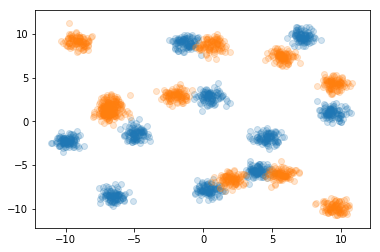

In [35]:

plt.scatter(df_blobs[:,0],df_blobs[:,1], alpha=0.2)
plt.scatter(df_blobs[:,2],df_blobs[:,3], alpha=0.2)


In [17]:
X = np.array(df,dtype='float64')

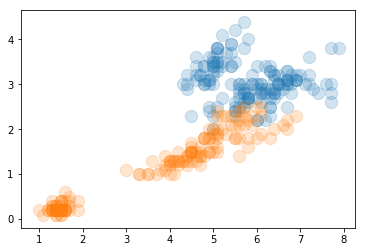

In [28]:
plt.scatter(X[:,0],X[:,1], alpha=0.2,s=150)
plt.scatter(X[:,2],X[:,3], alpha=0.2, s=150)

# Finding Optimum Clusters 

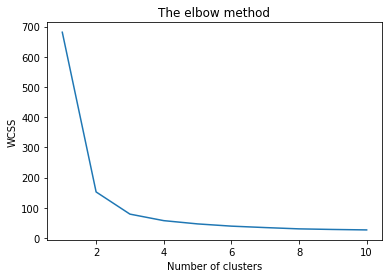

In [37]:
x = df.iloc[:, [0, 1, 2, 3]].values

from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
# Plotting the results onto a line graph, 
# `allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

# Implementing K-means Clustering 

In [38]:
# Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

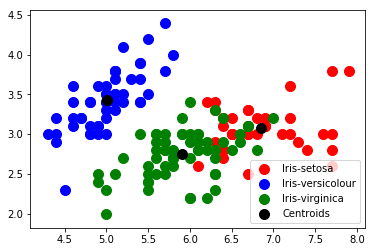

In [40]:
# Visualising the clusters - On the first two columns
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'black', label = 'Centroids')

plt.legend()